# HealthHabit - Hospital Multiclassification Problem
The Recent COVID-19 pandemic has raised alarms over one of the most overlooked areas to focus on: Healthcare Management. While healthcare management has various use cases for using data science, patient length of stay or LOS in short is one critical parameter to observe and predict if one wants to improve the efficiency of healthcare management in a hospital.
This parameter helps hospitals to identify patients of high LOS risk (patients who will stay longer) at the time of admission. Once identified, patients with high LOS risk can have their treatment plan optimized to minimize LOS and lower the chance of staff/visitor infection. Also, prior knowledge of LOS can aid in logistics such as room and bed allocation planning. Ypose we have been hired as a Data Scieforist at Health Habitat a not-for-profit organization dedicated to managing the functioning of Hospitals professionally and optimally. The task is to accurately predict the Length of Stay for each patient on a case-by-case basis so that the Hospitals can use this information for optimal resource allocation and better function PREDICT: The length of stay is divided into 11 different classes ranging from 0-10 days to more than 100 days.

# Step :- 1 Import the needed packages and import data file 

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from torch.optim import Adam
from torch.utils.data import TensorDataset,DataLoader
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

In [11]:
data=pd.read_csv('4.1(b) hospital_stay_data - hospital_stay_data.csv')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

Here our main goal to predict "stay" !

In [16]:
data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558,41-50


In [18]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
case_id,318438.0,159219.500000,91925.276848,1.0,79610.25,159219.5,238828.75,318438.0
Hospital_code,318438.0,18.318841,8.633755,1.0,11.00,19.0,26.00,32.0
City_Code_Hospital,318438.0,4.771717,3.102535,1.0,2.00,5.0,7.00,13.0
Available Extra Rooms in Hospital,318438.0,3.197627,1.168171,0.0,2.00,3.0,4.00,24.0
Bed Grade,318325.0,2.625807,0.873146,1.0,2.00,3.0,3.00,4.0
patientid,318438.0,65747.579472,37979.936440,1.0,32847.00,65724.5,98470.00,131624.0
City_Code_Patient,313906.0,7.251859,4.745266,1.0,4.00,8.0,8.00,38.0
Visitors with Patient,318438.0,3.284099,1.764061,0.0,2.00,3.0,4.00,32.0
Admission_Deposit,318438.0,4880.749392,1086.776254,1800.0,4186.00,4741.0,5409.00,11008.0


there is 1 thing is common that case id and patientid are never have any impact on our label "Stay" . so later we can drop it.

# Step 2 :- Data cleaning mainly handling null values !

In [25]:
#1st let's see who and how many cantains null values :- 
data.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

__We can observe__ 1 thing here that the max'm rows of who contains null values is < 4700 i.e. < 1.47% of total dataset. So if we can drop out such rows who contains null values will not put significent effect on our result or prediction.

In [28]:
# Let's drop out null values containing rows.
data.dropna(inplace=True)

In [30]:
data.isnull().sum()

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
patientid                            0
City_Code_Patient                    0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64

__2) Lets' drop out 2 columns who never have significent role :- case_id , patientid__

In [38]:
data.drop(['case_id','patientid'],axis=1,inplace=True)

__3) Handling data formating i.e. conversion of object column in numerical.__

In [43]:
not_num_col=data.select_dtypes(include='O').columns
not_num_col

Index(['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type',
       'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness', 'Age',
       'Stay'],
      dtype='object')

We will handle it in futher coming step !

# Step 3 :- Data Visualization and taking insight !

<Figure size 2000x2000 with 0 Axes>

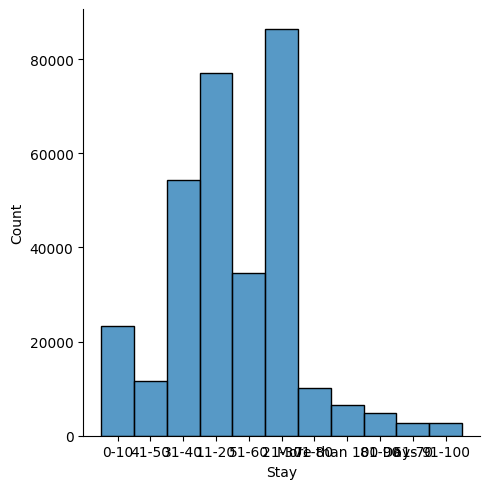

In [54]:
plt.figure(figsize=(20,20))
sns.displot(data,x='Stay')

In [56]:
data.corr(numeric_only=True)

,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,City_Code_Patient,Visitors with Patient,Admission_Deposit
Hospital_code,1.000000,0.128403,-0.059348,-0.013627,-0.015709,-0.028103,0.044950
City_Code_Hospital,0.128403,1.000000,-0.045547,-0.048096,-0.023951,0.019330,-0.035185
Available Extra Rooms in Hospital,-0.059348,-0.045547,1.000000,-0.117125,-0.009651,0.096230,-0.143806
Bed Grade,-0.013627,-0.048096,-0.117125,1.000000,-0.008105,0.088195,0.074930
City_Code_Patient,-0.015709,-0.023951,-0.009651,-0.008105,1.000000,-0.012107,0.025803
Visitors with Patient,-0.028103,0.019330,0.096230,0.088195,-0.012107,1.000000,-0.149940
Admission_Deposit,0.044950,-0.035185,-0.143806,0.074930,0.025803,-0.149940,1.000000


<Axes: >

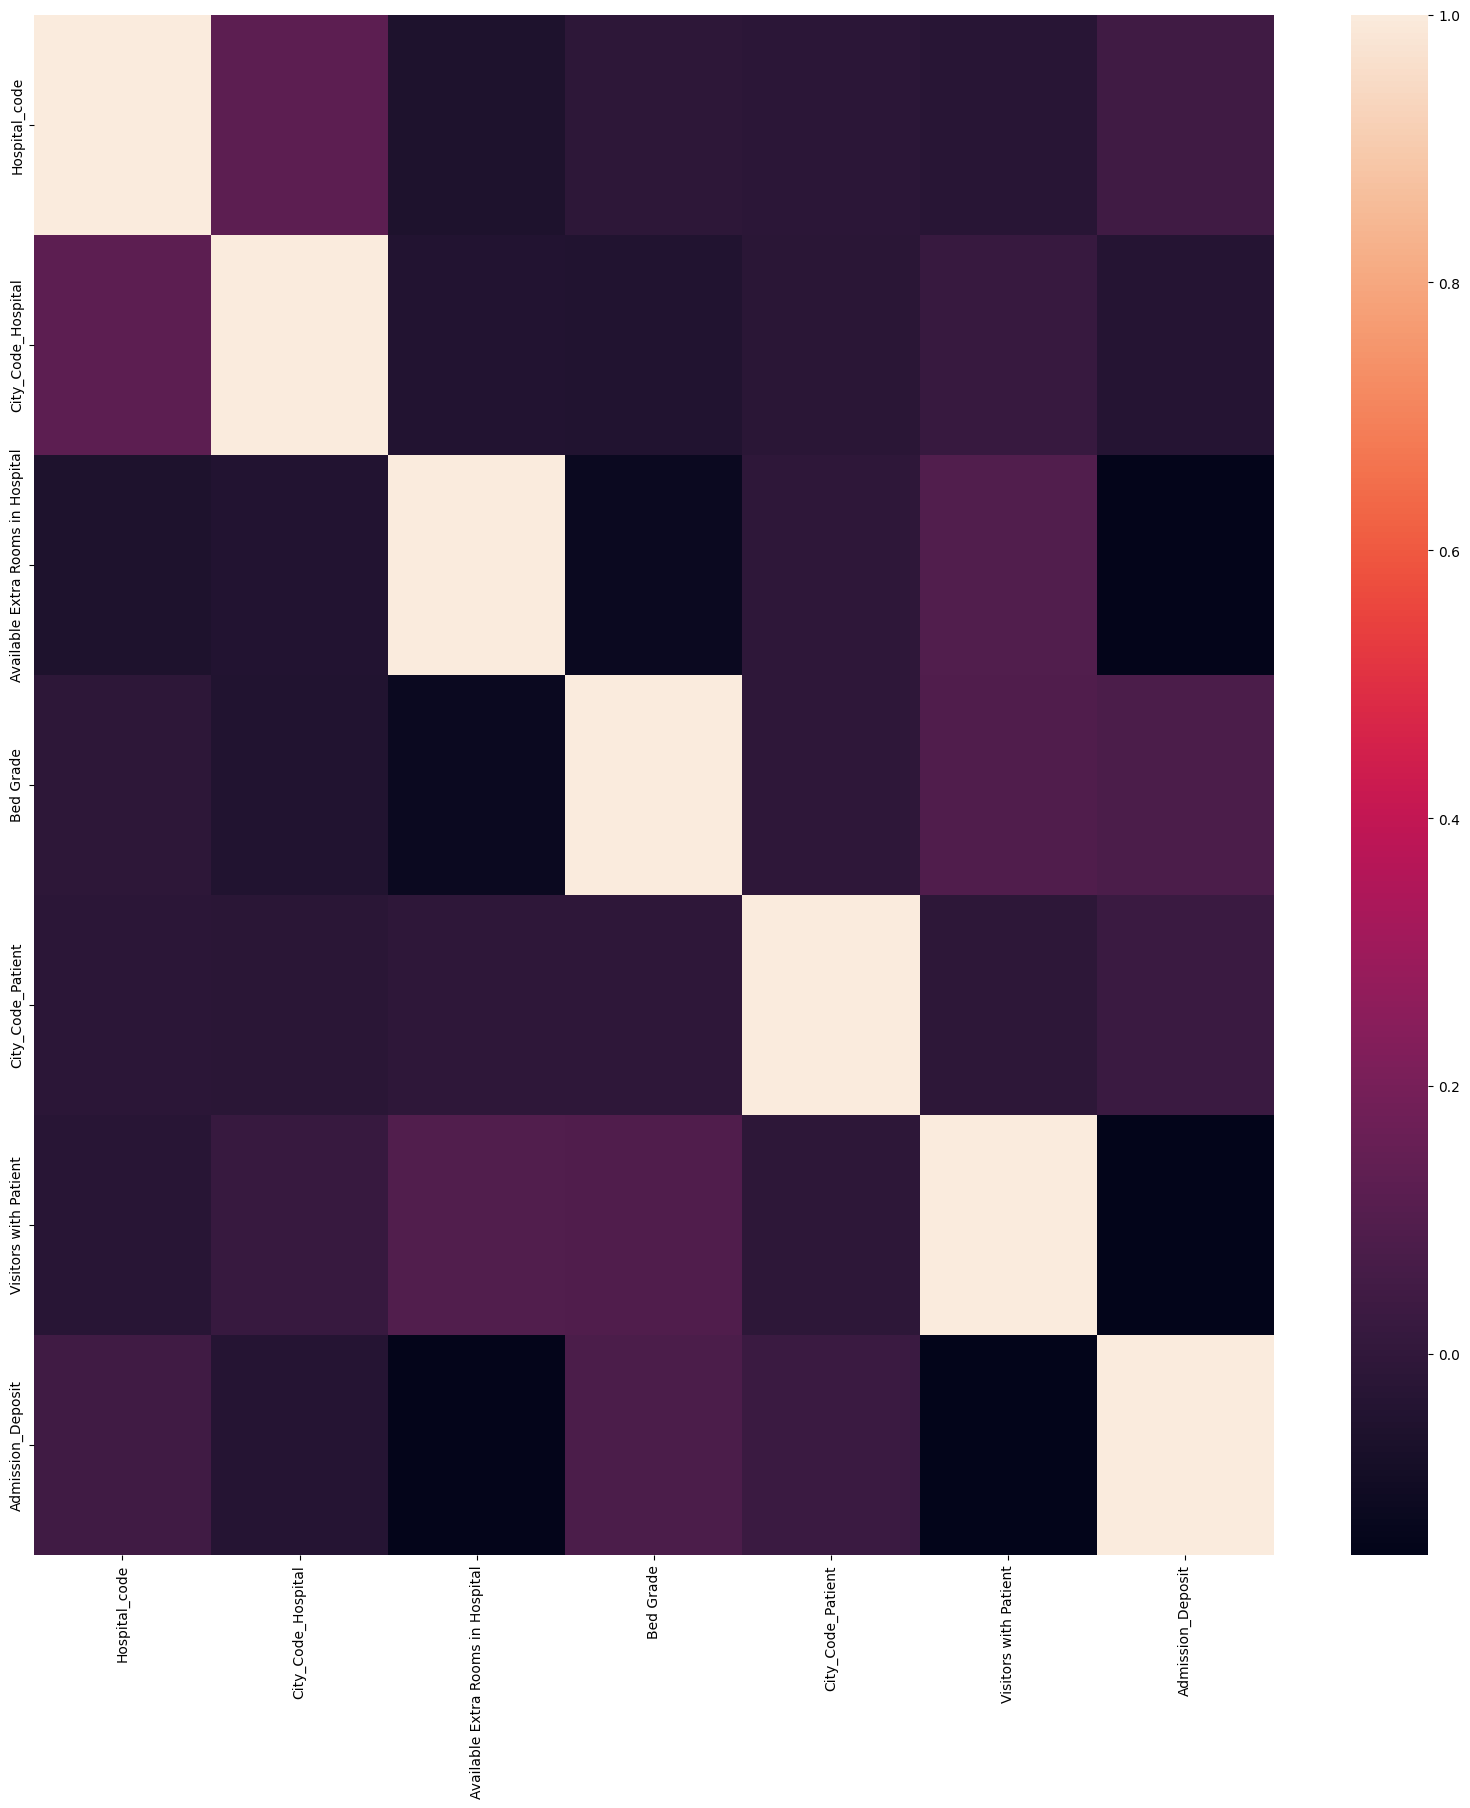

In [60]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(numeric_only=True))

__Note :-__ we can see here no 2 columns are highly corelated here so no need to remove.

# Step 4 :- Spliting the data set and handling data format and applying normalization

In [70]:
numerical_col=data.select_dtypes(exclude='O').columns.to_list()
cat_col=['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type',
       'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness', 'Age']
transform=ColumnTransformer(transformers=[
    ('num',StandardScaler(),numerical_col),
    ('cat',OneHotEncoder(),cat_col)
])

In [72]:
# 1st apply split before transform , to avoid data leak
X=data.drop('Stay',axis=1)
Y=data['Stay']
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.33, random_state=42)

In [78]:
X_train=transform.fit_transform(X_train)
X_test=transform.transform(X_test)
label_encoder=LabelEncoder()
y_train=label_encoder.fit_transform(y_train)
y_test=label_encoder.transform(y_test)

In [82]:
type(X_train)

numpy.ndarray

In [84]:
type(y_train)

numpy.ndarray

In [86]:
X_train_tensor=torch.tensor(X_train,dtype=torch.float32)
X_test_tensor=torch.tensor(X_test,dtype=torch.float32)
y_train_tensor=torch.tensor(y_train,dtype=torch.float32)
y_test_tensor=torch.tensor(y_test,dtype=torch.float32)

# Step 5 :- Developing Model and evaluation function

In [140]:
class myModel(nn.Module):
    def __init__(self):
        super(myModel, self).__init__()
        self.l1 = nn.Linear(X_train.shape[1], 512)
        self.n1 = nn.LayerNorm(512)

        self.l2 = nn.Linear(512, 128)
        self.n2 = nn.LayerNorm(128)
        self.d2 = nn.Dropout(0.5)

        self.l3 = nn.Linear(128, 64)
        self.n3 = nn.LayerNorm(64)
        self.d3 = nn.Dropout(0.5)

        self.l4 = nn.Linear(64, 11)

    def forward(self, x):
        x = F.leaky_relu(self.n1(self.l1(x)))
        x = F.leaky_relu(self.n2(self.l2(x)))
        x = self.d2(x)
        x = F.leaky_relu(self.n3(self.l3(x)))
        x = self.d3(x)
        x = self.l4(x)  # Multi-class classification: softmax handled by cost function
        return x


In [93]:
# Let's create the dataset and data loader
train_data_loader=DataLoader(TensorDataset(X_train_tensor,y_train_tensor),batch_size=64,shuffle=True)
test_data_loader=DataLoader(TensorDataset(X_test_tensor,y_test_tensor),batch_size=64,shuffle=True)

In [148]:
def calculate_accuracy(model,loader):
    model.eval()
    total =0
    correct =0
    for x,y in loader:
        y_pred=model(x)
        _,y_pred=torch.max(y_pred.data,1)
        total +=y.size(0)
        correct += (y==y_pred).sum().item()

    return 100*correct/total      
         
        

In [158]:
def train_evaluation_model(model, optim, cost_fun, patience=5, epochs=100, print_every=10):
    train_loss_list = []
    test_loss_list = []

    # For early stopping
    max_loss = float('inf')
    patience_count = 0

    # Training loop
    for epoch in range(epochs):
        model.train()  # Set model to training mode
        train_loss = 0
        for x, y in train_data_loader:
            y_pred = model(x)
            y = y.long()  # CrossEntropyLoss requires long labels
            optim.zero_grad()
            loss = cost_fun(y_pred, y)
            loss.backward()
            optim.step()
            train_loss += loss.item()
        train_loss /= len(train_data_loader)  # Average train loss
        train_loss_list.append(train_loss)

        # Testing loop
        model.eval()  # Set model to evaluation mode
        test_loss = 0
        for x, y in test_data_loader:
            y_pred = model(x)
            y = y.long()
            loss = cost_fun(y_pred, y)
            test_loss += loss.item()
        test_loss /= len(test_data_loader)
        test_loss_list.append(test_loss)

        # Accuracy calculation
        train_accu = calculate_accuracy(model, train_data_loader)
        test_accu = calculate_accuracy(model, test_data_loader)

        # Printing progress
        if (epoch + 1) % print_every == 0:
            print(f'Epoch: {epoch + 1}, Train Accuracy: {train_accu:.4f}, Test Accuracy: {test_accu:.4f}')

        # Early stopping
        if max_loss > test_loss:
            max_loss = test_loss
            patience_count = 0
        else:
            patience_count += 1
        if patience_count == patience:
            print(f'Early stopping triggered at epoch {epoch + 1}')
            break

    # Plotting the loss curve
    plt.figure(figsize=(10, 6))
    plt.plot(train_loss_list, label='Train Loss')
    plt.plot(test_loss_list, label='Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title("Loss Curve for Training and Testing")
    plt.show()


# Step 6 :- final model train and evaluation

Epoch: 10, Train Accuracy: 42.4104, Test Accuracy: 41.9480
Epoch: 20, Train Accuracy: 43.1215, Test Accuracy: 41.9615
Epoch: 30, Train Accuracy: 43.7170, Test Accuracy: 42.0542
Epoch: 40, Train Accuracy: 43.8792, Test Accuracy: 42.0465
Epoch: 50, Train Accuracy: 44.3011, Test Accuracy: 42.0224
Epoch: 60, Train Accuracy: 44.6369, Test Accuracy: 41.9132
Early stopping triggered at epoch 68


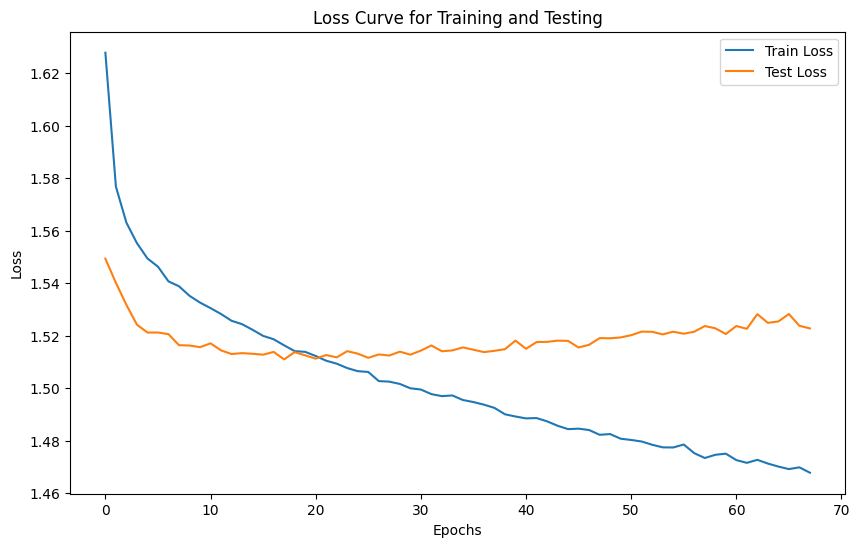

In [162]:
model=myModel()
criterion=nn.CrossEntropyLoss()
optim=Adam(model.parameters(),lr=0.001)
train_evaluation_model(model,optim,criterion,patience=50)